In [5]:
import utils
import os, pickle

config = utils.create_config(features = ['distance.origin-prob','distance.head-prob', 'pose.prob_x','pose.prob_y'],
                            contamination = 0.04,
                            grouped_range = 60,
                            add_golay = False,
                            add_mv_stats = False,
                            show_true_annotations = False)

In [3]:
bouts_dict = utils.read_pickle('bouts_dict.pkl')
true_peak_annotations_df = utils.read_pickle('true_annotations.pkl')
fly_db = utils.create_fly_database(bouts_dict, true_peak_annotations_df=true_peak_annotations_df)


ValueError: unsupported pickle protocol: 5

In [7]:
bouts_dict = utils.read_pickle('bouts_dict.pkl')

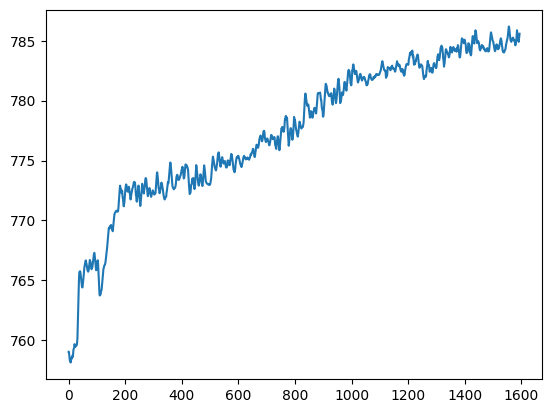

In [42]:
import matplotlib.pyplot as plt
trace = bouts_dict['Fly08022022_6d_SD_B']['pose.thor_post_x'][0]
plt.plot(bouts_dict['Fly08022022_6d_SD_B']['pose.thor_post_x'][0])
plt.show()

In [43]:
trace.std()

6.136929833898631

In [61]:
trace = bouts_dict['Fly08022022_6d_SD_B']['distance.origin-thor_post'][0]

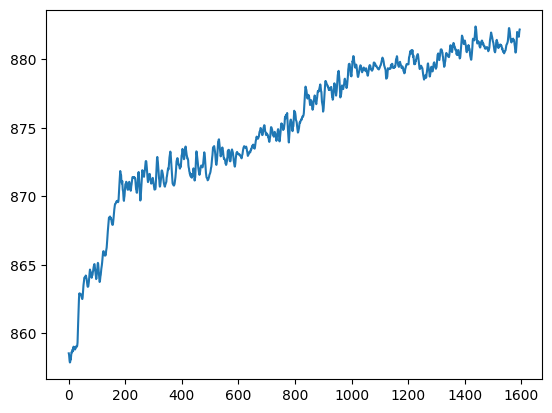

In [62]:
plt.plot(trace)
plt.show()

In [63]:
trace.std()

5.305853769942641

In [65]:
bouts_dict['Fly08022022_6d_SD_B'].columns

Index(['start_index', 'stop_index', 'region', 'pose.prob_x', 'pose.prob_y',
       'pose.halt_x', 'pose.halt_y', 'pose.thor_post_x', 'pose.thor_post_y',
       'distance.origin-halt', 'distance.origin-prob',
       'distance.origin-thor_post', 'distance.head-prob',
       'distance.thor_post-halt',
       'distance.avg(thor_post-joint1,thor_post-joint2,thor_post-joint3)',
       'distance.avg(origin-joint1,origin-joint2,origin-joint3)',
       'distance.origin-prob_segmented'],
      dtype='object')

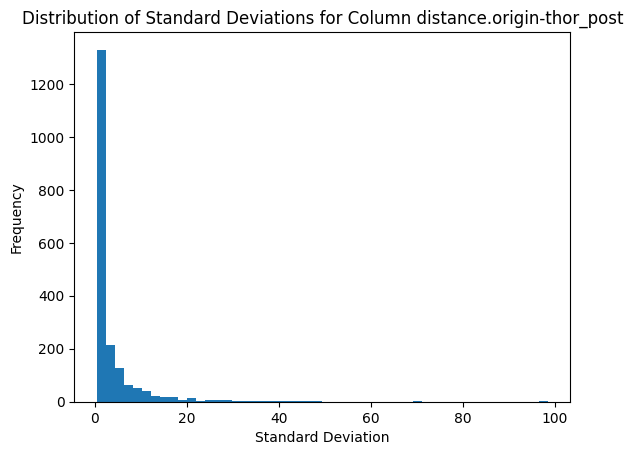

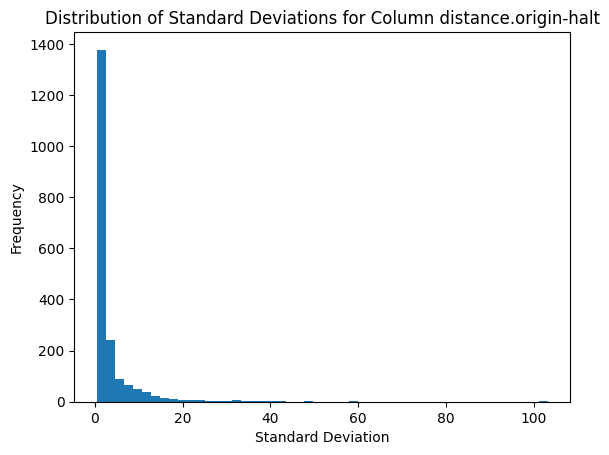

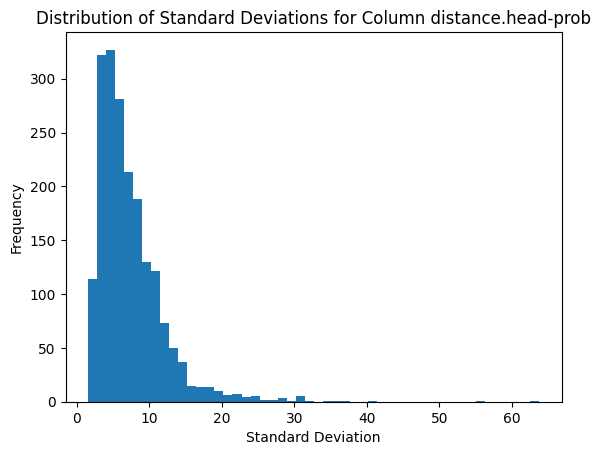

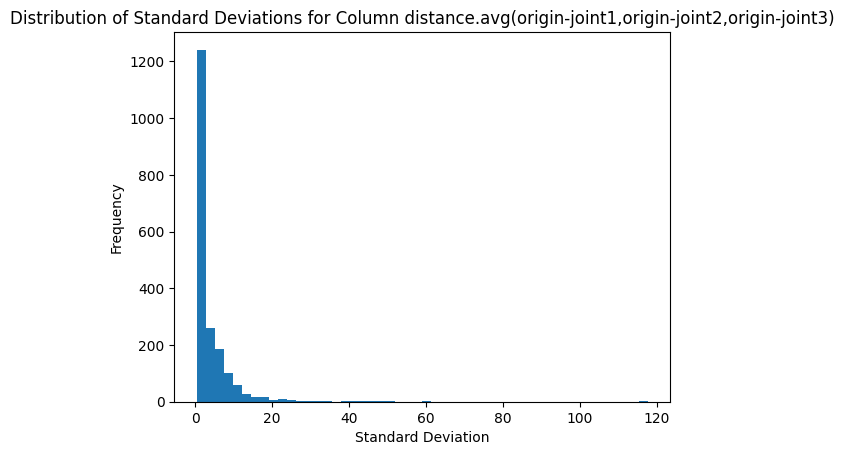

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# List of columns of interest
columns_of_interest = ['distance.origin-thor_post','distance.origin-halt','distance.head-prob','distance.avg(origin-joint1,origin-joint2,origin-joint3)']

# Dictionary to store standard deviations, organized by column
std_dict = {col: [] for col in columns_of_interest}

# Your existing dictionary of DataFrames
dict_of_dfs = bouts_dict

# Iterate over experiments (keys)
for exp_key, df in dict_of_dfs.items():
    
    # Iterate only over specified columns
    for col in columns_of_interest:
        
        # Skip if the column is not in the DataFrame
        if col not in df.columns:
            continue
        
        # Iterate over rows in the specific column
        for idx, cell_data in enumerate(df[col]):
            
            # Convert cell_data to a NumPy array for easier calculations
            time_series = np.array(cell_data)
            
            # Compute standard deviation
            std_dev = np.std(time_series)
            
            # Store this standard deviation in the dictionary under the appropriate column
            std_dict[col].append(std_dev)

# Create histograms for each column
for col, std_list in std_dict.items():
    
    # Convert std_list to a NumPy array for easier manipulation
    std_array = np.array(std_list)
    
    plt.figure()  # Create a new figure for each column
    plt.hist(std_array, bins=50)  # You can change the number of bins as needed
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Standard Deviations for Column {col}')
    plt.show()

with open('bouts_std.pkl', 'wb') as f:
    pickle.dump(std_dict, f)

In [68]:
normalized_std_array

array([0.13285409, 0.47265747, 0.02300471, ..., 0.02606729, 0.08208334,
       0.27263855])

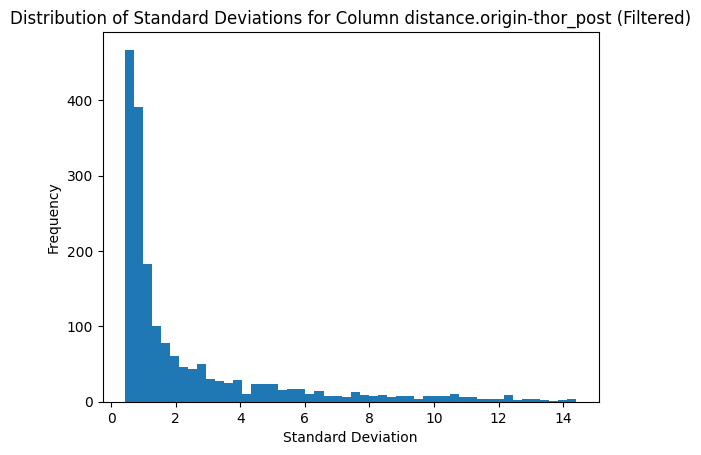

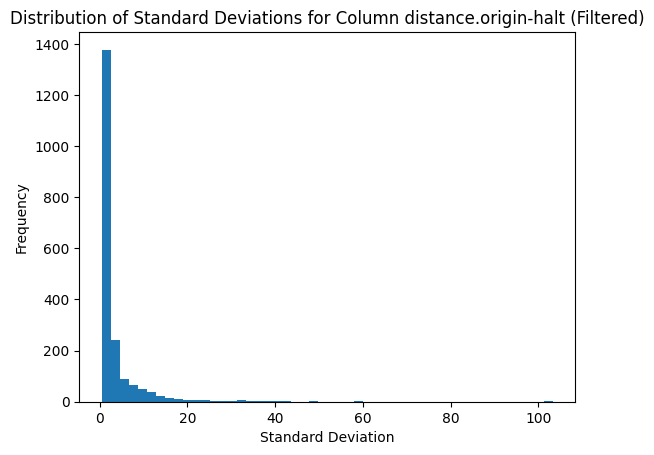

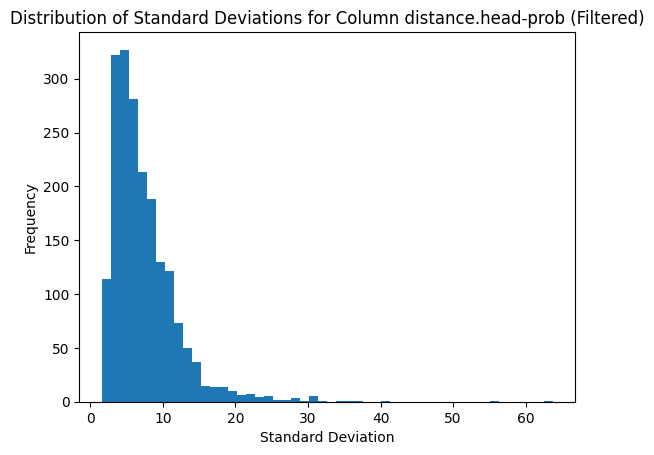

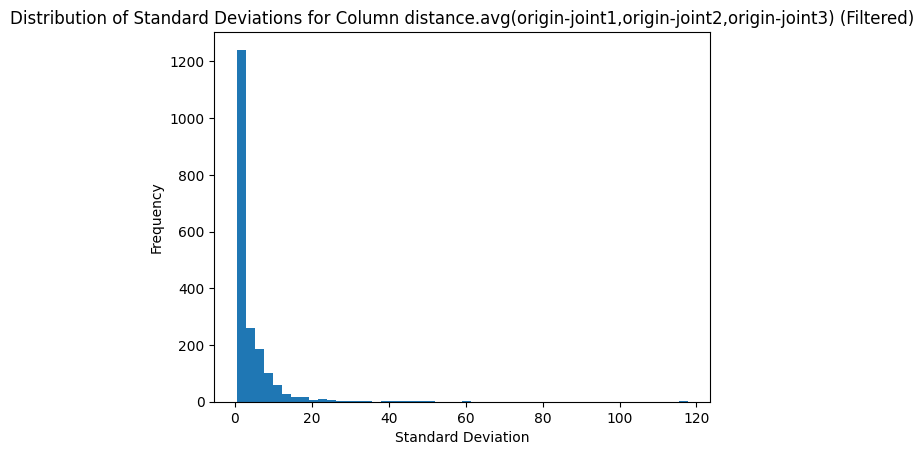

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# List of columns of interest
columns_of_interest = ['distance.origin-thor_post', 'distance.origin-halt', 'distance.head-prob', 'distance.avg(origin-joint1,origin-joint2,origin-joint3)']

# Dictionary to store standard deviations, organized by column
std_dict = {col: [] for col in columns_of_interest}

# Additional dictionaries to store experiment keys and indices corresponding to each standard deviation
exp_keys_dict = {col: [] for col in columns_of_interest}
idxs_dict = {col: [] for col in columns_of_interest}

# Dictionaries to store filtered and removed standard deviations
filtered_bouts_dict = {col: [] for col in columns_of_interest}
removed_bouts_dict = {col: [] for col in columns_of_interest}

# Your existing dictionary of DataFrames (for demonstration, replace with your actual dictionary)
dict_of_dfs = bouts_dict  # Replace this with your bouts_dict

# Iterate over experiments (keys)
for exp_key, df in dict_of_dfs.items():
    
    # Iterate only over specified columns
    for col in columns_of_interest:
        
        # Skip if the column is not in the DataFrame
        if col not in df.columns:
            continue
        
        # Iterate over rows in the specific column
        for idx, cell_data in enumerate(df[col]):
            
            # Convert cell_data to a NumPy array for easier calculations
            time_series = np.array(cell_data)
            
            # Compute standard deviation
            std_dev = np.std(time_series)
            
            # Store this standard deviation in the dictionary under the appropriate column
            std_dict[col].append(std_dev)
            exp_keys_dict[col].append(exp_key)
            idxs_dict[col].append(idx)

# Calculate the 95th percentile for the 'distance.origin-thor_post' column
percentile_95 = np.percentile(std_dict['distance.origin-thor_post'], 95)

# Separate data based on the 95th percentile
for col in columns_of_interest:
    for exp_key, idx, std_dev in zip(exp_keys_dict[col], idxs_dict[col], std_dict[col]):
        if col == 'distance.origin-thor_post' and std_dev > percentile_95:
            removed_bouts_dict[col].append((exp_key, idx, std_dev))
        else:
            filtered_bouts_dict[col].append((exp_key, idx, std_dev))

# Create histograms for each column in filtered_bouts_dict
for col, std_list in filtered_bouts_dict.items():
    
    # Extract the standard deviation values from the tuples
    std_array = np.array([t[2] for t in std_list])
    
    plt.figure()  # Create a new figure for each column
    plt.hist(std_array, bins=50)  # You can change the number of bins as needed
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Standard Deviations for Column {col} (Filtered)')
    plt.show()

# Save the filtered and removed dictionaries
with open('filtered_bouts_std.pkl', 'wb') as f:
    pickle.dump(filtered_bouts_dict, f)

with open('removed_bouts_std.pkl', 'wb') as f:
    pickle.dump(removed_bouts_dict, f)


In [169]:
import pandas as pd
# Step 1: Calculate the 95th percentile based on the standard deviations of "distance.origin-thor_post"
all_std_values = []
for exp_key, df in bouts_dict.items():
    if "distance.origin-thor_post" in df.columns:
        for time_series in df["distance.origin-thor_post"]:
            all_std_values.append(np.std(time_series) / np.sqrt(len(time_series)))

# Calculate the 95th percentile
percentile_95 = np.percentile(all_std_values, 95)

# Step 2: Create two new dictionaries of DataFrames
filtered_bouts_dict = {}
removed_bouts_dict = {}

for exp_key, df in bouts_dict.items():
    if "distance.origin-thor_post" not in df.columns:
        continue
    
    # Initialize empty DataFrames with the same columns for each experiment
    filtered_df = pd.DataFrame(columns=df.columns)
    removed_df = pd.DataFrame(columns=df.columns)
    
    for idx, row in df.iterrows():
        time_series = row["distance.origin-thor_post"]
        std_dev = np.std(time_series) / np.sqrt(len(time_series))
        
        if std_dev > percentile_95:
            removed_df = removed_df.append(row)
        else:
            filtered_df = filtered_df.append(row)
    
    # Store the filtered and removed DataFrames in their respective dictionaries
    filtered_bouts_dict[exp_key] = filtered_df.reset_index(drop=True)
    removed_bouts_dict[exp_key] = removed_df.reset_index(drop=True)

filtered_bouts_dict, removed_bouts_dict

({'Fly08022022_6d_SD_B':   start_index stop_index               region  \
  0       25886      27480  Fly08022022_6d_SD_B   
  1      164295     165605  Fly08022022_6d_SD_B   
  2      439906     441017  Fly08022022_6d_SD_B   
  
                                           pose.prob_x  \
  0  [560.2674867659807, 563.4234387129545, 566.579...   
  1  [932.1198892593384, 931.9556339581808, 931.879...   
  2  [1001.2057900031408, 1001.5866277217865, 1001....   
  
                                           pose.prob_y  \
  0  [376.944912130634, 374.4901364892721, 371.6412...   
  1  [621.9242204229037, 622.0024285068115, 621.823...   
  2  [470.04109370708466, 470.20261603593826, 470.3...   
  
                                           pose.halt_x  \
  0  [740.2003645102183, 739.9911094071964, 739.681...   
  1  [752.4093451313674, 752.6971930861473, 752.695...   
  2  [862.2910725275675, 862.2778785228729, 862.275...   
  
                                           pose.halt_y  \
  0  [3

In [170]:
removed_bouts_dict.keys()

dict_keys(['Fly08022022_6d_SD_B', 'Fly05272022_SD_5d', 'Fly07212022_6d_SD_A', 'Fly06252022_5d_SD_A', 'Fly06262022_5d_SD_A', 'Fly07122022_5d_SD_A', 'Fly06202022_5d', 'Fly07222022_6d_SD_B', 'Fly07132022_5d_SD_B', 'Fly06232022_5d_B_SD', 'Fly06212022_5d', 'Fly07192022_5d_SD_B', 'Fly05252022_SD_5d', 'Fly07222022_6d_SD_A', 'Fly06232022_5d_A_SD', 'Fly07052022_5d_SD_A', 'Fly05182022_5d', 'Fly07062022_5d_SD_B', 'Fly07132022_5d_SD_A', 'Fly06082022_5d', 'Fly07062022_5d_A', 'Fly05222022_5d', 'Fly06302022_5d_SD_A', 'Fly06232022_4d_B', 'Fly07262022_6d_SD_A', 'Fly06242022_5d_SD_B', 'Fly06142022_SD_5d', 'Fly06242022_5_SD_A', 'Fly07142022_5d_SD_A', 'Fly07182022_7d_SD_A', 'Fly07202022_6d_SD_B', 'Fly06252022_5d_SD_B', 'Fly08022022_6d_B', 'Fly06182022_4d', 'Fly08032022_6d_SD_B', 'Fly07052022_5d_A', 'Fly06292022_5d_A', 'Fly06292022_5d_B', 'Fly07082022_5d_B', 'Fly07062022_5d_SD_A', 'Fly07112022_5d_A', 'Fly06272022_5d_SD_A', 'Fly07252022_6d_A', 'Fly08032022_6d_B', 'Fly06282022_5d_SD_B', 'Fly07282022_6d_SD_B'

In [182]:
removed_bouts_dict['Fly07062022_5d_SD_B']

,start_index,stop_index,region,pose.prob_x,pose.prob_y,pose.halt_x,pose.halt_y,pose.thor_post_x,pose.thor_post_y,distance.origin-halt,distance.origin-prob,distance.origin-thor_post,distance.head-prob,distance.thor_post-halt,"distance.avg(thor_post-joint1,thor_post-joint2,thor_post-joint3)","distance.avg(origin-joint1,origin-joint2,origin-joint3)",distance.origin-prob_segmented
0,420439,421553,Fly07062022_5d_SD_B,"[909.4469672342142, 909.3502941926321, 909.152...","[619.6926058928171, 619.2520100275675, 619.188...","[767.0136357943217, 766.9173205693563, 766.646...","[582.5919660230478, 583.3353519241015, 583.708...","[752.0925894656943, 751.6896125425895, 751.353...","[531.5853444399933, 530.9192789060374, 530.353...","[963.1839473169309, 963.5571126786913, 963.567...","[1100.5056619616912, 1100.1777172218174, 1099....","[920.991987778721, 920.2785199701964, 919.6770...","[73.12424896574815, 72.79515270531205, 72.7711...","[53.14426656618725, 54.58321905479263, 55.5041...","[162.15448587816982, 162.60450256279415, 162.9...","[1033.2275982200538, 1033.272612165734, 1033.2...","[[1100.5056619616912, 1100.1777172218174, 1099..."
1,597839,599011,Fly07062022_5d_SD_B,"[660.5858845015367, 661.6914470642805, 662.294...","[631.6398543864489, 633.0562958071629, 634.444...","[504.7476604779561, 506.27293705940247, 508.18...","[573.5534553229809, 571.2278784550726, 568.902...","[511.340782272319, 511.3990419358015, 511.4007...","[570.100503368037, 568.9156332356589, 567.5934...","[764.0247161387521, 763.2912785582165, 762.823...","[913.9707962796251, 915.7487891223814, 917.144...","[765.8224203791349, 764.979723805008, 763.9980...","[69.01354011141294, 69.62592262620736, 70.1618...","[7.442589078973363, 5.62347127302556, 3.473905...","[135.2461983235222, 135.05353798358456, 134.73...","[873.4166556474587, 872.48952183724, 871.40919...","[[913.9707962796251, 915.7487891223814, 917.14..."


In [195]:
trace = removed_bouts_dict['Fly07212022_6d_SD_A']['distance.origin-thor_post'][0]

KeyError: 0

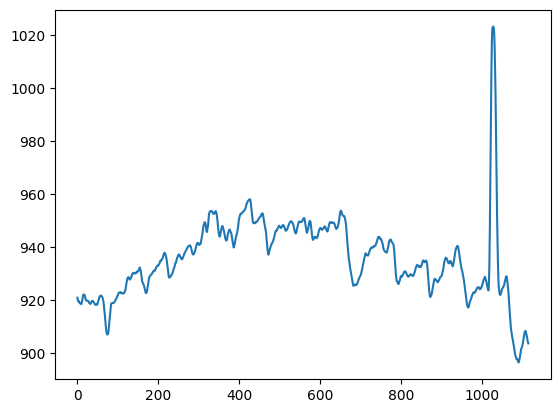

In [184]:
plt.plot(trace)

In [194]:
trace = removed_bouts_dict['Fly07212022_6d_SD_A']['distance.origin-prob'][0]
plt.plot(trace)

KeyError: 0

In [141]:
test_pkl = removed_bouts_dict['Fly06082022_5d']

In [142]:
test_pkl.to_pickle('test.pkl')

In [143]:
removed_bouts_dict['Fly06082022_5d']

,start_index,stop_index,region,pose.prob_x,pose.prob_y,pose.halt_x,pose.halt_y,pose.thor_post_x,pose.thor_post_y,distance.origin-halt,distance.origin-prob,distance.origin-thor_post,distance.head-prob,distance.thor_post-halt,"distance.avg(thor_post-joint1,thor_post-joint2,thor_post-joint3)","distance.avg(origin-joint1,origin-joint2,origin-joint3)",distance.origin-prob_segmented
0,1033888,1035123,Fly06082022_5d,"[626.0768503894409, 626.9070727974176, 627.806...","[256.9610382715861, 257.2084142963092, 257.517...","[793.0890784983834, 793.8303901925683, 794.486...","[263.72358655929565, 263.19614092508954, 262.6...","[799.8046172360579, 800.4242670834064, 801.547...","[297.9041670958201, 297.60338004430133, 297.32...","[835.7873034098527, 836.3246361259154, 836.777...","[676.7578575703233, 677.6198390751621, 678.569...","[853.483636940493, 853.9594716084606, 854.9167...","[81.29840475121246, 81.41624948134006, 81.4789...","[34.83404292285124, 35.033374320184286, 35.383...","[175.36059911101404, 174.729687007734, 174.242...","[745.7324459835514, 746.2795822709394, 746.814...","[[676.7578575703233, 677.6198390751621, 678.56..."


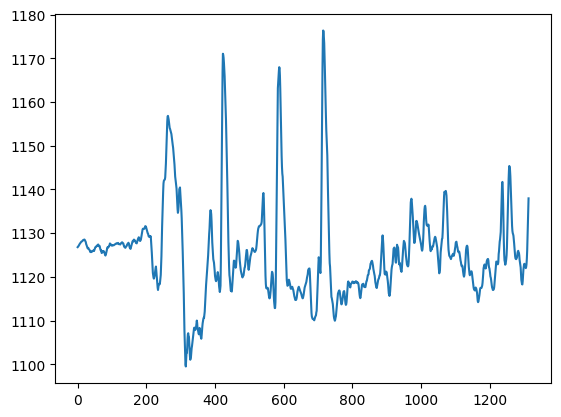

In [198]:
plt.plot(filtered_bouts_dict['Fly07212022_6d_SD_A']['distance.origin-prob'][0])

In [152]:
import pywt
import numpy as np
from scipy import signal
def create_wavelet_filter_bank(signal_length, sampling_frequency, freq_limits, wavelet_name):
    # Create wavelet
    wavelet = pywt.ContinuousWavelet(wavelet_name)
    
    # Create scales
    scales = np.arange(1, signal_length, 1)
    
    # Create frequencies
    frequencies = pywt.scale2frequency(wavelet, scales) * sampling_frequency
    
    # Filter frequencies within the limits
    valid_indices = np.where((frequencies >= freq_limits[0]) & (frequencies <= freq_limits[1]))
    valid_frequencies = frequencies[valid_indices]
    valid_scales = scales[valid_indices]
    
    return valid_scales, valid_frequencies

def get_scale_spectrum(filter_bank, signal):
    valid_scales, _ = filter_bank
    coeffs, _ = pywt.cwt(signal, valid_scales, 'cmor')
    return coeffs


In [153]:
signal_length = 1000  # Replace with size(tsSnap{i}, 1)
sampling_frequency = 30
freq_limits = [0.25, 1]
wavelet_name = 'cmor'  # or any other wavelet type you want to use

# Create the filter bank
filter_bank = create_wavelet_filter_bank(signal_length, sampling_frequency, freq_limits, wavelet_name)


# Get the scale spectrum
coeffs = get_scale_spectrum(filter_bank, trace)

/Users/mehmetkeles/opt/anaconda3/envs/tracking/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  
/Users/mehmetkeles/opt/anaconda3/envs/tracking/lib/python3.7/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


TypeError: Image data of dtype complex128 cannot be converted to float

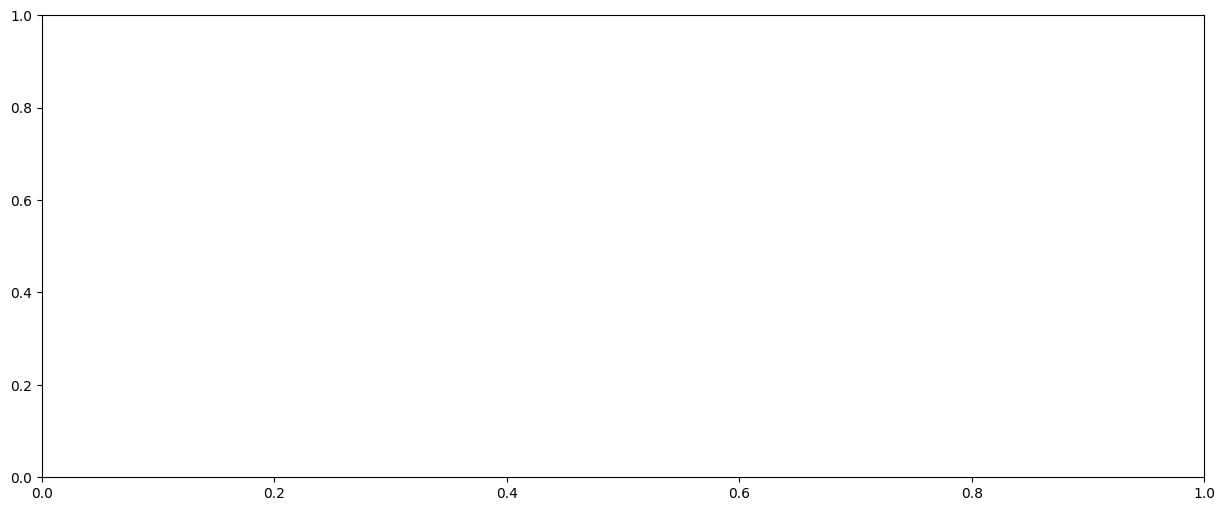

In [160]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(15, 6))
plt.imshow(coeffs, aspect='auto', cmap='jet', interpolation='nearest')
plt.colorbar(label='Coefficient Value')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Wavelet Transform Coefficients')
plt.show()

In [186]:
#save some portion of it:

In [187]:
import pandas as pd
import pickle

dict_of_dfs = bouts_dict



# Slice the first 5 key-value pairs from the dictionary
sliced_dict_of_dfs = {k: dict_of_dfs[k] for k in list(dict_of_dfs.keys())[:5]}

# Save the sliced dictionary in .pkl format
with open('sliced_dict_of_dfs.pkl', 'wb') as f:
    pickle.dump(sliced_dict_of_dfs, f)


In [188]:
sliced_dict_of_dfs.keys()

dict_keys(['Fly08022022_6d_SD_B', 'Fly05272022_SD_5d', 'Fly07212022_6d_SD_A', 'Fly06252022_5d_SD_A', 'Fly06262022_5d_SD_A'])

In [193]:
sliced_dict_of_dfs['Fly07212022_6d_SD_A'].shape

(9, 17)

In [192]:
#one approach to achieve this, requires further tuning though

# Importing necessary libraries and modules
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt

# Function for smoothing the time series using Savitzky-Golay filter
def smooth_time_series(time_series, window_length=11, polyorder=3):
    return savgol_filter(time_series, window_length, polyorder)

# Function to check if the time series is stationary
def is_stationary(time_series, threshold=5):
    return np.max(time_series) - np.min(time_series) <= threshold

# Function to segment the time series
def segment_time_series(time_series, window_size=75):
    segments = []
    start = 0
    while start + window_size <= len(time_series):
        segments.append(time_series[start:start + window_size])
        start += window_size // 2  # 50% overlap
    return segments

# Function to calculate correlation between two segments
def calculate_correlation(segment1, segment2):
    return np.corrcoef(segment1, segment2)[0, 1]

# Function to check for significant change in the segment
def significant_change(segment, rate_threshold=15, points_threshold=30):
    return np.max(segment) - np.min(segment) >= rate_threshold and len(segment) >= points_threshold

# Initialize the annotation dictionary
annotations = {}

# Iterate through each experiment and DataFrame
for exp_key, df in bouts_dict.items():
    annotation = []
    
    # If "distance.origin-thor_post" not in columns, continue to next iteration
    if "distance.origin-thor_post" not in df.columns:
        continue
    
    # Apply Savitzky-Golay smoothing to the time series data
    df_smooth = df.apply(lambda x: smooth_time_series(x) if isinstance(x, np.ndarray) else x)
    
    # Check if the "distance.origin-thor_post" column is stationary
    if is_stationary(df_smooth['distance.origin-thor_post'].iloc[0]):
        annotation.append(True)
        continue
    
    # Segment the time series
    thor_segments = segment_time_series(df_smooth['distance.origin-thor_post'].iloc[0])
    prob_segments = segment_time_series(df_smooth['distance.origin-prob'].iloc[0])
    
    # Check each segment for correlation and significant change
    for thor_seg, prob_seg in zip(thor_segments, prob_segments):
        corr = calculate_correlation(thor_seg, prob_seg)
        if corr < 0.8:
            if significant_change(thor_seg) or significant_change(prob_seg):
                annotation.append(True)
            else:
                annotation.append(False)
        else:
            annotation.append(False)
            
    annotations[exp_key] = annotation

# Check first few annotations to see if the code works as expected
first_few_annotations = {key: annotations[key] for key in list(annotations.keys())[:5]}
first_few_annotations


In [192]:
#one approach to achieve this, requires further tuning though

# Importing necessary libraries and modules
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt

# Function for smoothing the time series using Savitzky-Golay filter
def smooth_time_series(time_series, window_length=61, polyorder=3):
    return savgol_filter(time_series, window_length, polyorder)

# Function to check if the time series is stationary
def is_stationary(time_series, threshold=7):
    return np.max(time_series) - np.min(time_series) <= threshold

# Function to segment the time series
def segment_time_series(time_series, window_size=75):
    segments = []
    start = 0
    while start + window_size <= len(time_series):
        segments.append(time_series[start:start + window_size])
        start += window_size // 2  # 50% overlap
    return segments

# Function to calculate correlation between two segments
def calculate_correlation(segment1, segment2):
    return np.corrcoef(segment1, segment2)[0, 1]

# Function to check for significant change in the segment
def significant_change(segment, rate_threshold=15, points_threshold=30):
    return np.max(segment) - np.min(segment) >= rate_threshold and len(segment) >= points_threshold


# Create an empty DataFrame with MultiIndex to hold annotations
annotations_df = pd.DataFrame(columns=['Annotation'])
annotations_df.index.name = ['exp_key', 'original_index']

# Main loop iterating through bouts_dict
for exp_key, df in bouts_dict.items():
    # If "distance.origin-thor_post" not in columns, continue to next iteration
    if "distance.origin-thor_post" not in df.columns:
        continue

    # Initialize a list to hold annotations for the current exp_key
    annotation = []

    for index, row in df.iterrows():
        ts_thor_data = row['distance.origin-thor_post']
        ts_thor_data_smooth = smooth_time_series(ts_thor_data)

        #if there is very little change in the entire time-series then label it true
        if is_stationary(ts_thor_data_smooth):
            annotation.append(True)
            continue
            
        


    # Convert annotation list to a DataFrame with the appropriate MultiIndex
    temp_df = pd.DataFrame(annotation, columns=['Annotation'])
    temp_df['exp_key'] = exp_key
    temp_df['original_index'] = df.index
    temp_df.set_index(['exp_key', 'original_index'], inplace=True)

    # Append to the main annotations DataFrame
    annotations_df = pd.concat([annotations_df, temp_df])

# Now annotations_df holds all the annotations with MultiIndex (exp_key, original_index)

        
            
        
    


In [199]:
first_key = list(sliced_dict_of_dfs.keys())[0]

In [200]:
first_key

'Fly08022022_6d_SD_B'

In [201]:
sliced_dict_of_dfs[first_key]

,start_index,stop_index,region,pose.prob_x,pose.prob_y,pose.halt_x,pose.halt_y,pose.thor_post_x,pose.thor_post_y,distance.origin-halt,distance.origin-prob,distance.origin-thor_post,distance.head-prob,distance.thor_post-halt,"distance.avg(thor_post-joint1,thor_post-joint2,thor_post-joint3)","distance.avg(origin-joint1,origin-joint2,origin-joint3)",distance.origin-prob_segmented
0,25886,27480,Fly08022022_6d_SD_B,"[560.2674867659807, 563.4234387129545, 566.579...","[376.944912130634, 374.4901364892721, 371.6412...","[740.2003645102183, 739.9911094071964, 739.681...","[361.2953839302063, 361.13586648305255, 360.97...","[759.0354959170023, 759.0294677217802, 758.802...","[401.19881904125214, 401.02297647794086, 400.8...","[823.6691897056337, 823.4111707173753, 823.063...","[675.2681863587532, 676.5270383501934, 677.590...","[858.5425886128569, 858.4551010584281, 858.172...","[66.63783410754098, 65.34948492424904, 65.0285...","[44.12534769010063, 44.197744637693894, 44.218...","[181.1475453188581, 180.98023535151233, 180.88...","[748.3288001704823, 748.2642331183318, 748.115...","[[675.2681863587532, 676.5270383501934, 677.59..."
1,130126,131384,Fly08022022_6d_SD_B,"[895.3112794607878, 895.1558222522339, 895.000...","[150.66675655047098, 150.65931006272635, 150.6...","[897.2066330115, 897.2326778968176, 897.258722...","[339.5045042037964, 339.46439003944397, 339.42...","[862.1325496435165, 861.999044418335, 861.8655...","[342.9556700189908, 342.9983994960785, 342.945...","[959.2929952285162, 959.3031587515733, 959.313...","[907.9001920140515, 907.7456548068129, 907.592...","[927.8421874182083, 927.7339352610716, 927.590...","[87.89273998615339, 87.80470302158548, 87.5877...","[35.24346562964858, 35.41042432583423, 35.5678...","[160.47512030666215, 160.5446340061484, 160.56...","[1008.4972109530501, 1008.5044679774234, 1008....","[[907.9001920140515, 907.7456548068129, 907.59..."
2,164295,165605,Fly08022022_6d_SD_B,"[932.1198892593384, 931.9556339581808, 931.879...","[621.9242204229037, 622.0024285068115, 621.823...","[752.4093451313674, 752.6971930861473, 752.695...","[595.462761554867, 595.9712180693945, 596.3370...","[757.0845412413279, 757.225207666556, 757.2043...","[562.5580627123514, 562.6832326352596, 562.726...","[959.5289068285341, 960.0701835006035, 960.296...","[1120.5521959736984, 1120.4589794966907, 1120....","[943.2118407384769, 943.3994039718938, 943.408...","[88.52484354528991, 88.18473874507596, 87.8602...","[33.23517210100221, 33.594536613913384, 33.911...","[172.65856018119766, 172.92136918763921, 173.0...","[1057.1972576159126, 1057.702175561525, 1057.9...","[[1120.5521959736984, 1120.4589794966907, 1120..."
3,439906,441017,Fly08022022_6d_SD_B,"[1001.2057900031408, 1001.5866277217865, 1001....","[470.04109370708466, 470.20261603593826, 470.3...","[862.2910725275675, 862.2778785228729, 862.275...","[355.19462289412814, 355.0527958869934, 355.14...","[831.1597726643085, 830.9471826752027, 831.026...","[389.5113400419553, 389.5192061463992, 389.562...","[932.581960952304, 932.5157519619052, 932.5484...","[1106.0522879634423, 1106.4656673201118, 1106....","[917.9028552720952, 917.7136984663451, 917.804...","[82.98369185772786, 83.13882496129297, 83.3214...","[46.33351818047191, 46.57838488471763, 46.4889...","[177.97973925502473, 178.258162379317, 178.174...","[1028.804927253763, 1028.8074517790158, 1028.8...","[[1106.0522879634423, 1106.4656673201118, 1106..."
